In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# 0.) Clean the Apple Data to get a quarterly series of EPS.

In [7]:
y=pd.read_csv("AAPL_quarterly_financials.csv")

In [8]:
y.index=y.name

In [9]:
y=pd.DataFrame(y.loc["BasicEPS",:]).iloc[2:,:]

In [10]:
y.index=pd.to_datetime(y.index)

In [11]:
y.fillna(0.).sort_index()

,BasicEPS
1985-09-30,0.0
1985-12-31,0.004
1986-03-31,0.002
1986-06-30,0.002
1986-09-30,0.0
...,...
2022-09-30,1.29
2022-12-31,1.89
2023-03-31,1.53
2023-06-30,1.27


# 1.) Import data. Train, Test, Holdout (80%,15%,5%)

In [ ]:
y

# 2.) Normalize all the X data

# 3.) Come up with 6 search terms you think could nowcast earnings. (Different than the ones I used) Add in 3 terms that that you think will not Nowcast earnings. Pull in the gtrends data. Clean it to have a quarterly average.

In [1]:
!pip install pytrends

In [14]:
from pytrends.request import TrendReq

In [12]:
import time

In [15]:
# Create pytrends object
pytrends = TrendReq(hl='en-US', tz=360)

# Set up the keywords and the timeframe
keywords = ["The stock market", "The Fed","Inflation","Unemployment","Flat Earth","Area 51"]  # Add your keywords here
start_date = '2004-01-01'
end_date = '2024-01-01'

# Create an empty DataFrame to store the results
df = pd.DataFrame()

# Iterate through keywords and fetch data
for keyword in keywords:
    pytrends.build_payload([keyword], cat=0, timeframe=f'{start_date} {end_date}', geo='', gprop='')
    interest_over_time_df = pytrends.interest_over_time()
    df[keyword] = interest_over_time_df[keyword]

In [17]:
X=df.resample("Q").mean()

In [18]:
temp=pd.concat([y,X],axis=1).dropna()
y=temp[["BasicEPS"]].copy()
X=temp.iloc[:,1:].copy()

In [19]:
#normalize X data


In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()

In [22]:
X_scaled = scaler.fit_transform(X)

# 4.) Run a Lasso with lambda of .5. Plot a bar chart.

In [23]:
from sklearn.linear_model import Lasso

In [24]:
lasso=Lasso(alpha=.1)

In [25]:
lasso.fit(X_scaled,y)

Lasso(alpha=0.1)

In [27]:
coefficients=lasso.coef_

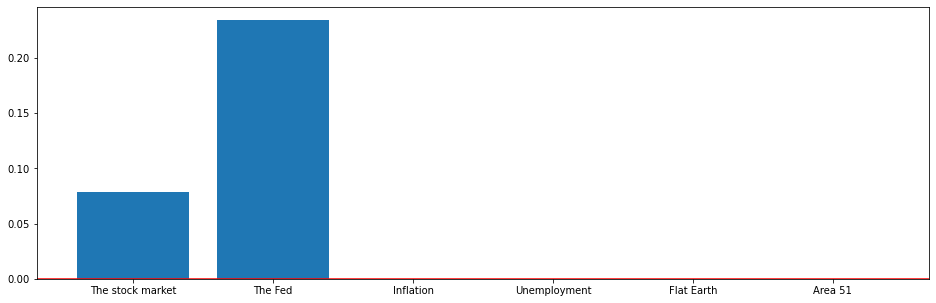

In [33]:
plt.figure(figsize = (16, 5))
plt.bar(range(len(coefficients)),coefficients,tick_label=X.columns)
plt.axhline(0., color = 'red')
plt.show()

# 5.) Do these coefficient magnitudes make sense?

In [35]:
#Coefficients like "The Fed" and "The stock market" 
#show that they can nowcast earnings, which makes sense
#because the market has strong influence on company earnings.
#coefficients like "Flat Earth" and "Area 51" shows no impact 
# as they are utterly irrelevant in this topic.
#"Inflation" and "Unemployment" may show no strength here
# but still worth considering in related subjects.

# 6.) Run a for loop looking at 10 different Lambdas and plot the coefficient magnitude for each.

# 7.) Run a cross validation. What is your ideal lambda?